In [1]:
# Basic setup
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

sns.set_style("whitegrid")

# Load the dataset
data = fetch_california_housing()

# Turn it into a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Look at the first few rows
df.head()
# df.info()
# df.describe()
# df.shape

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

X_train.shape, X_test.shape

def pipeline_linear_regression():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', SelectFromModel(LinearRegression())),
        ('model', LinearRegression())
    ])
    return pipeline


pipeline = pipeline_linear_regression()

pipeline.fit(X_train, y_train)
pipeline
# Make predictions
predictions = pipeline.predict(X_test)
print(predictions)

selected_mask = pipeline.named_steps['selector'].get_support()
selected_features = X_train.columns[selected_mask]
print(selected_features)

[3.14932704 5.2028055  1.62009528 ... 2.57202379 2.98087515 3.88915908]
Index(['MedInc', 'Latitude', 'Longitude'], dtype='object')


In [29]:
import pandas as pd

# Extract the coefficients
coeffs = pipeline.named_steps['model'].coef_

# Extract the feature names (already selected)
features = X_train.columns[pipeline.named_steps['selector'].get_support()]

# Pair them together in a readable format
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coeffs
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coeff_df)


     Feature  Coefficient
1   Latitude    -1.038871
2  Longitude    -1.003760
0     MedInc     0.693899


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Generate predictions (we have but I feel it should live here to remind you :) 
predictions = pipeline.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Print results
print(f"R² Score:       {r2:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")


R² Score:       0.573
Mean Absolute Error: 0.555
Root Mean Squared Error: 0.760


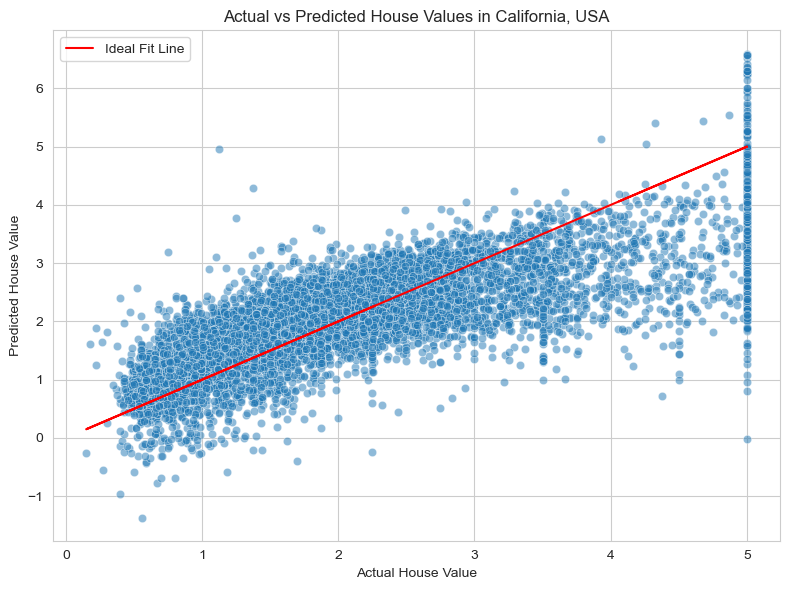

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.5)
plt.plot(y_test, y_test, color='red', label='Ideal Fit Line')
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted House Values in California, USA")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
